<a href="https://colab.research.google.com/github/jeremysb1/xgboost/blob/main/AB_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

excluding_list = ['price', 'id', 'latitude', 'longitude', 'host_id', 'last_review', 'name', 'host_name']
categorical = ['neighbourhood_group', 'neighbourhood', 'room_type']
continuous = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']

data = pd.read_csv("/content/drive/MyDrive/XGBoost/AB_NYC_2019.csv")

In [2]:
data.shape

(48895, 16)

In [3]:
data[categorical].nunique()

neighbourhood_group      5
neighbourhood          221
room_type                3
dtype: int64

Separating the low from the high cardinality categorical features and process only the low cardinality ones:

In [4]:
low_card_categorical = ['neighbourhood_group', 'room_type']
high_card_categorical = ['neighbourhood']

The following command asks to flag true missing values and then computes a count of them across features:

In [5]:
data[low_card_categorical + continuous].isna().sum()

neighbourhood_group                   0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
dtype: int64

In [6]:
data.reviews_per_month.min()

0.01

A histogram describing how the Price feature is distributed:

array([[<Axes: title={'center': 'price'}>]], dtype=object)

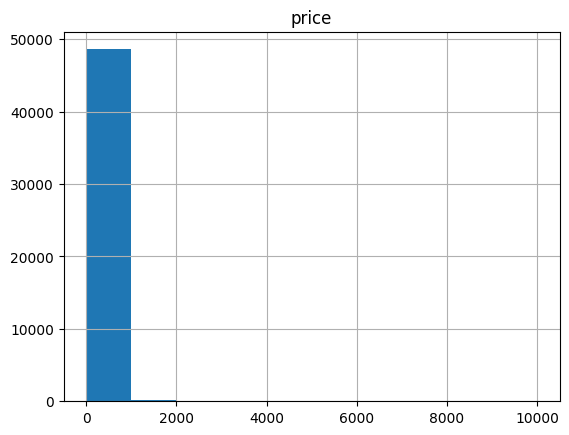

In [7]:
data[["price"]].hist(bins=10)

A boxplot highlighting the distribution of the Price feature and its right heavy tail on large price values:

<Axes: >

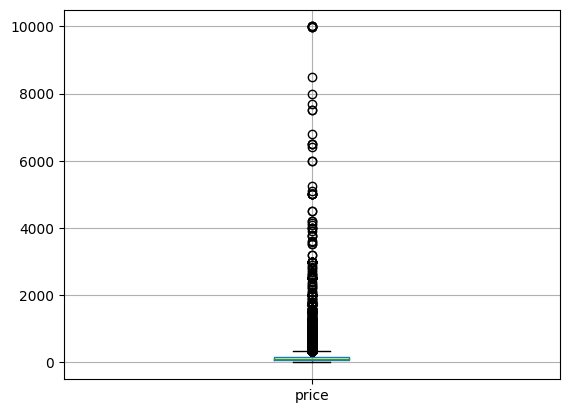

In [8]:
data[["price"]].boxplot()

In the following code snippet, II represent the transformed price feature by application of a logarithmic transformation:

<Axes: >

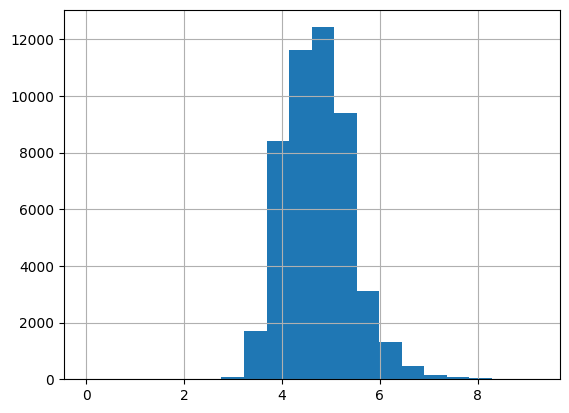

In [9]:
np.log1p(data["price"]).hist(bins=20)


The histogram is of the Price feature being more symmetrical after log transformation.

A boxplot of the Price feature after log transformation signaling the persistence of extreme values at both the tails of the distribution:

<Axes: >

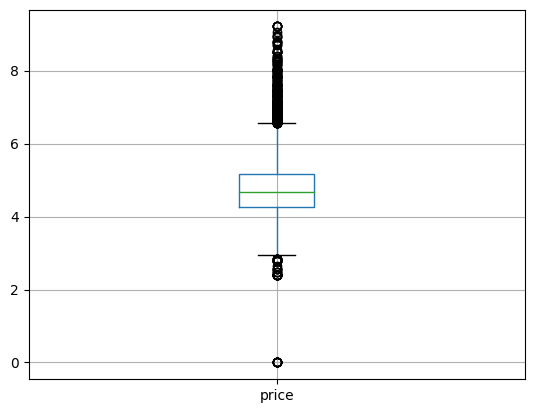

In [10]:
data[["price"]].apply(lambda x: np.log1p(x)).boxplot()

In the following code snippet, I produce a histogram focused only on price values below 1000:

array([[<Axes: title={'center': 'price'}>]], dtype=object)

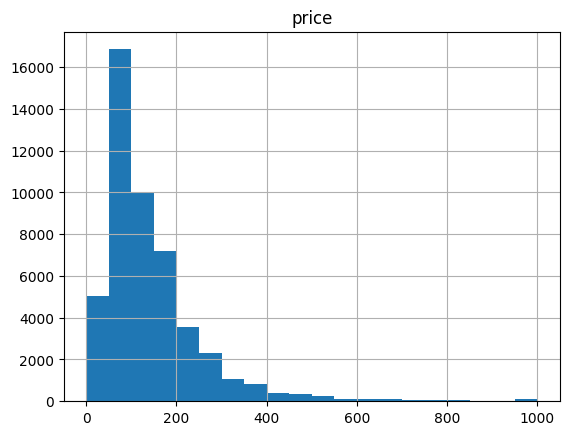

In [11]:
data[["price"]][data.price <= 1000].hist(bins=20)

Here, the represented distribution is still right-skewed, but it resembles more common distributions found in e-commerce or other sales with long-tail products.

If I focus on the range between 50 and 200, the distribution will appear more uniform.

In the following code snippet, I restrict our focus further only to prices between 50 and 200 and plot the relative histogram:

array([[<Axes: title={'center': 'price'}>]], dtype=object)

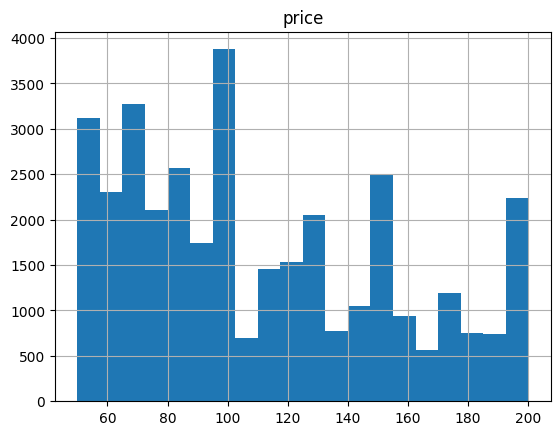

In [12]:
data[["price"]][(data.price >=50) & (data.price <=200)].hist(bins=20)

I can create two masking variables, made of booleans, that can help filter the target according to the type of algorithm I would like to test.

The price_capped variable will be instrumental when demonstrating how certain machine learning algorithms can handle long tails easily:

In [13]:
price_capped = data.price <= 1000
price_window = (data.price >= 50) & (data.price <= 200)

Here is the boxplot relative to the capped price, which presents right-sided outliers, but at least the boxplot is visible:

<Axes: >

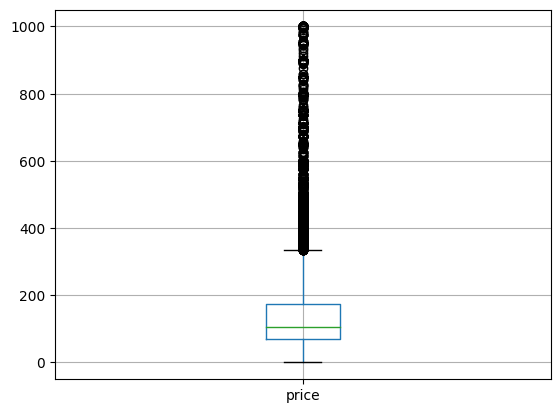

In [18]:
data[["price"]][price_capped].boxplot()

And here is the boxplot relative to the windowed price, showing no sign of outliers:

<Axes: >

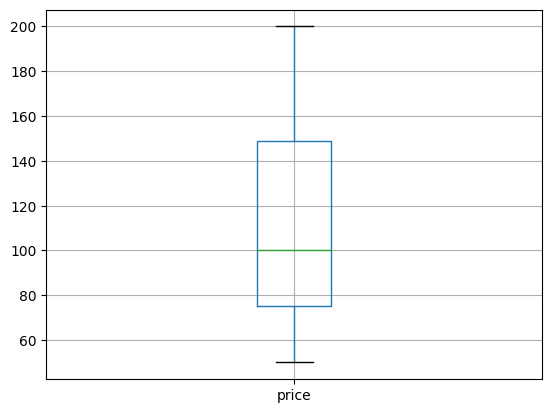

In [19]:
data[["price"]][price_window].boxplot()

Above is a boxplot of the Price feature for values between 50 and 200 showing a slightly right-skewed distribution with no extreme values.